# United States Real Estate Dataset

* This dataset contains the real estate listings in the US broken down by states and zip code. 

* The project objective is data exploration and cleaning to set the precise for the future prediction of housing prices.

In [43]:
# The necessary libraries have already been installed in
# in this Python 3 environment. 

# Importing the necessary libraries. 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import plotly.graph_objects as go
import plotly.offline as py
import plotly.express as px 
plt.style.use("fivethirtyeight")  #using style ggplot
from mpl_toolkits.mplot3d import Axes3D
import datetime as dt

In [6]:
# Importing the dataset
df = pd.read_csv('/Users/a.n/jupyter/realtor-dataset-100k.csv', encoding='ISO-8859-2')

## Understanding the MetaData

In [8]:
# Display the FIRST 5 observations
df.head()

,status,price,bed,bath,acre_lot,full_address,street,city,state,zip_code,house_size,sold_date
0,for_sale,105000,3.0,2.0,0.12,"Sector Yahuecas Titulo # V84, Adjuntas, PR, 00601",Sector Yahuecas Titulo # V84,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,for_sale,80000,4.0,2.0,0.08,"Km 78 9 Carr # 135, Adjuntas, PR, 00601",Km 78 9 Carr # 135,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,for_sale,67000,2.0,1.0,0.15,"556G 556-G 16 St, Juana Diaz, PR, 00795",556G 556-G 16 St,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,for_sale,145000,4.0,2.0,0.10,"R5 Comunidad El Paraso Calle De Oro R-5 Ponce,...",R5 Comunidad El Paraso Calle De Oro R-5 Ponce,Ponce,Puerto Rico,731.0,1800.0,NaN
4,for_sale,65000,6.0,2.0,0.05,"14 Navarro, Mayaguez, PR, 00680",14 Navarro,Mayaguez,Puerto Rico,680.0,NaN,NaN


In [9]:
# Display the LAST 5 observations
df.tail()

,status,price,bed,bath,acre_lot,full_address,street,city,state,zip_code,house_size,sold_date
99995,for_sale,749900,3.0,3.0,NaN,"8 Barretts Rd Unit 8, Hudson, MA, 01749",8 Barretts Rd Unit 8,Hudson,Massachusetts,1749.0,2864.0,NaN
99996,for_sale,349900,2.0,1.0,0.34,"10 Buttonwood Ln, Auburn, MA, 01501",10 Buttonwood Ln,Auburn,Massachusetts,1501.0,1075.0,6/7/1999
99997,for_sale,549000,3.0,2.0,1.01,"11 Joyce Cir, Shrewsbury, MA, 01545",11 Joyce Cir,Shrewsbury,Massachusetts,1545.0,1632.0,9/27/1995
99998,for_sale,299000,3.0,2.0,0.12,"47 Dorchester St, Worcester, MA, 01604",47 Dorchester St,Worcester,Massachusetts,1604.0,1332.0,9/11/2000
99999,for_sale,535000,3.0,3.0,21.67,"17 Flint Pond Dr Unit 17, Grafton, MA, 01536",17 Flint Pond Dr Unit 17,Grafton,Massachusetts,1536.0,1846.0,10/6/2020


In [10]:
# Display the number of variables and observations 
df.shape

(100000, 12)

In [13]:
# Display the varibale names and their Data Types
df.dtypes

status           object
price             int64
bed             float64
bath            float64
acre_lot        float64
full_address     object
street           object
city             object
state            object
zip_code        float64
house_size      float64
sold_date        object
dtype: object

In [14]:
# Display the complete Meta-Data of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   status        100000 non-null  object 
 1   price         100000 non-null  int64  
 2   bed           75050 non-null   float64
 3   bath          75112 non-null   float64
 4   acre_lot      85987 non-null   float64
 5   full_address  100000 non-null  object 
 6   street        99916 non-null   object 
 7   city          99948 non-null   object 
 8   state         100000 non-null  object 
 9   zip_code      99805 non-null   float64
 10  house_size    75082 non-null   float64
 11  sold_date     28745 non-null   object 
dtypes: float64(5), int64(1), object(6)
memory usage: 9.2+ MB


In [16]:
#Count of missing vales for each varaible
df.isnull().sum()

status              0
price               0
bed             24950
bath            24888
acre_lot        14013
full_address        0
street             84
city               52
state               0
zip_code          195
house_size      24918
sold_date       71255
dtype: int64

## Handling Duplicates & Missing Values

In [18]:
#Check for duplicates
df.duplicated().sum()

85140

In [19]:
#Remove the duplicates
df.drop_duplicates(inplace=True)

In [20]:
#Check for missing values!
df.isnull().sum()

status             0
price              0
bed             3449
bath            3448
acre_lot        1943
full_address       0
street            62
city              16
state              0
zip_code          28
house_size      3442
sold_date       9564
dtype: int64

We still have a lot of missing values in the dataset. Since the columns - bed, bath, house size have an effect on price prediction, we will drop the missing values in those columns. However, the acre-lot and sold_date columns are left as they are since they are not needed in the price prediction.

In [52]:
# Drop NA in bed, bath and house_size columns 
df.dropna(subset=["bed","bath","house_size", "city", "zip_code"],
          inplace=True)

In [53]:
# quick check!
df.isna().sum()/df.shape[0] # with percentages of each variables

status          0.000000
price           0.000000
bed             0.000000
bath            0.000000
acre_lot        0.165566
full_address    0.000000
street          0.003927
city            0.000000
state           0.000000
zip_code        0.000000
house_size      0.000000
sold_date       0.556230
dtype: float64

The percentages of null values in the rest of the columns are all too low for any serious impact.

In [27]:
# The remaining number of variables and observations of cleaned data
df.shape

(11204, 12)

After cleaning the data, we have been able to cut off about 90% of the dataset. This increases its usefulness.

In [30]:
# Inspect to ensure recent changes have taken effect.
df.head()

,status,price,bed,bath,acre_lot,full_address,street,city,state,zip_code,house_size,sold_date
0,for_sale,105000,3.0,2.0,0.12,Sector Yahuecas Titulo V84 Adjuntas PR 00601,Sector Yahuecas Titulo V84,Adjuntas,Puerto Rico,601.0,920.0,NaT
1,for_sale,80000,4.0,2.0,0.08,Km 78 9 Carr 135 Adjuntas PR 00601,Km 78 9 Carr 135,Adjuntas,Puerto Rico,601.0,1527.0,NaT
2,for_sale,67000,2.0,1.0,0.15,556G 556G 16 St Juana Diaz PR 00795,556G 556G 16 St,Juana Diaz,Puerto Rico,795.0,748.0,NaT
3,for_sale,145000,4.0,2.0,0.10,R5 Comunidad El Paraso Calle De Oro R5 Ponce P...,R5 Comunidad El Paraso Calle De Oro R5 Ponce,Ponce,Puerto Rico,731.0,1800.0,NaT
5,for_sale,179000,4.0,3.0,0.46,Bo Calabazas San Sebastian San Sebastian PR 00612,Bo Calabazas San Sebastian,San Sebastian,Puerto Rico,612.0,2520.0,NaT


## Descriptive Statistics

In [54]:
df.describe().round(2)

,price,bed,bath,acre_lot,zip_code,house_size
count,11204.00,11204.00,11204.00,9349.00,11204.00,11204.00
mean,561873.55,3.62,2.55,16.95,3517.37,2348.24
std,1183088.51,1.99,1.60,1042.38,2903.30,13800.66
min,10000.00,1.00,1.00,0.00,601.00,100.00
25%,224900.00,3.00,2.00,0.16,1145.50,1224.00
50%,340000.00,3.00,2.00,0.33,2864.00,1740.00
75%,549000.00,4.00,3.00,1.00,6066.00,2643.25
max,60000000.00,86.00,56.00,100000.00,95000.00,1450112.00


Here, we notice that the maximum price is about 6 million dollars, in price with and the minimum priced at $10,000. However the average price in the US is roughly 561,873 dollars, which is high compared to other North American countries.

## Visualizations

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



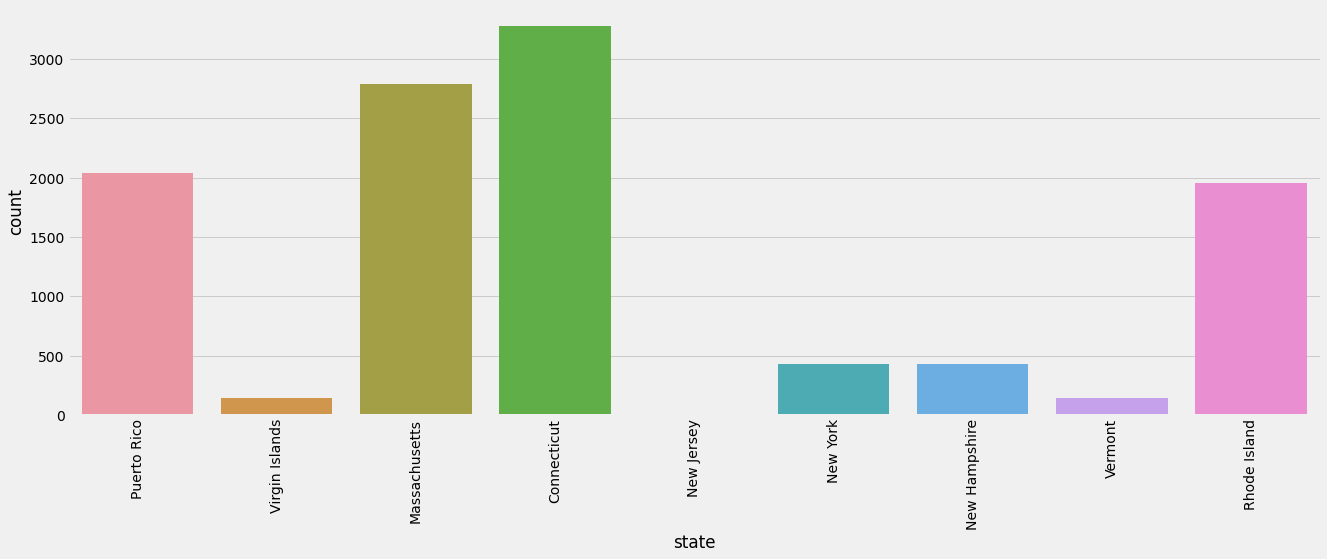

In [55]:
# The count of repeats that occur in the states
plt.figure(figsize=(20,7))
sns.countplot(df['state'])
plt.xticks(rotation=90)
plt.show()

### States with their number of repeats

- Connecticut       29 %
- Massachusetts     25 %
- Puerto Rico       18 %
- Rhode Island      17 %
- New York          3 %
- New Hampshire     3 %
- Virgin Islands    2 %
- Vermont           2 % 
- New Jersey        1 %

<AxesSubplot:xlabel='sold_date', ylabel='price'>

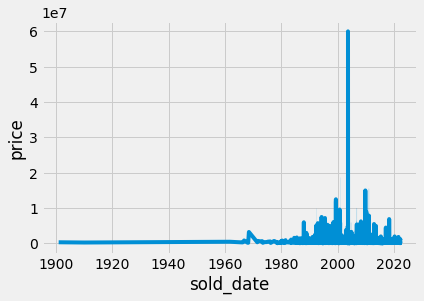

In [46]:
# Explore the change in price by the sold_date

sns.lineplot(data=df , x="sold_date",y="price")

You noticed a huge spike around 2009 due to housing market being driven into a Great Recession after the dip that happened between the year 2005 and 2008 due to the housing market crash. 

Text(0.5, 1.0, 'The relationship between number of baths and price')

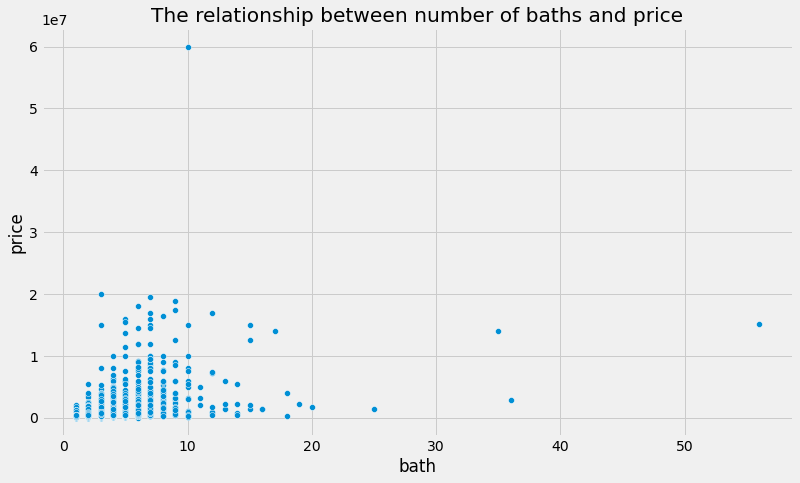

In [57]:
# Relationship between number of baths and price

plt.figure(figsize=(12,7))
sns.scatterplot(data=df,x="bath",y="price")
plt.title("The relationship between number of baths and price")

Text(0.5, 1.0, 'The relationship between number of beds and price')

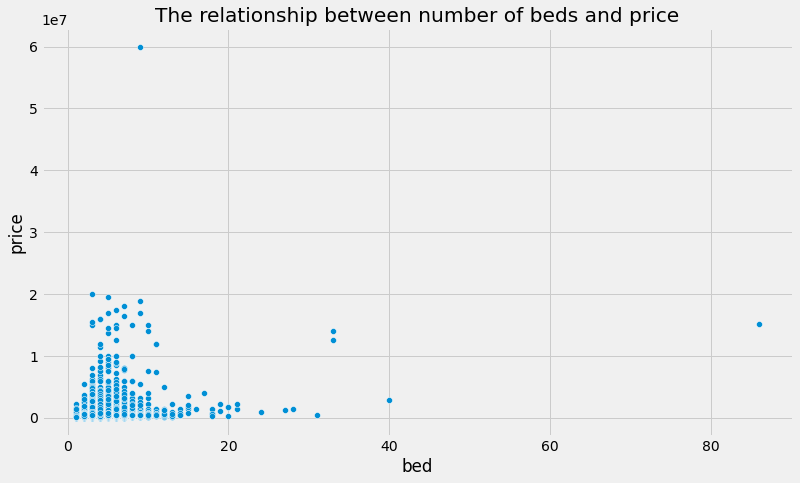

In [49]:
# Relationship between number of beds and price.

plt.figure(figsize=(12,7))
sns.scatterplot(data=df,x="bed",y="price")
plt.title("The relationship between number of beds and price")

An increase in the number of bathroom will need to an increase in the proce of the unit. Although they are a few outliers. 

Text(0.5, 1.0, 'The relationship between House size and price')

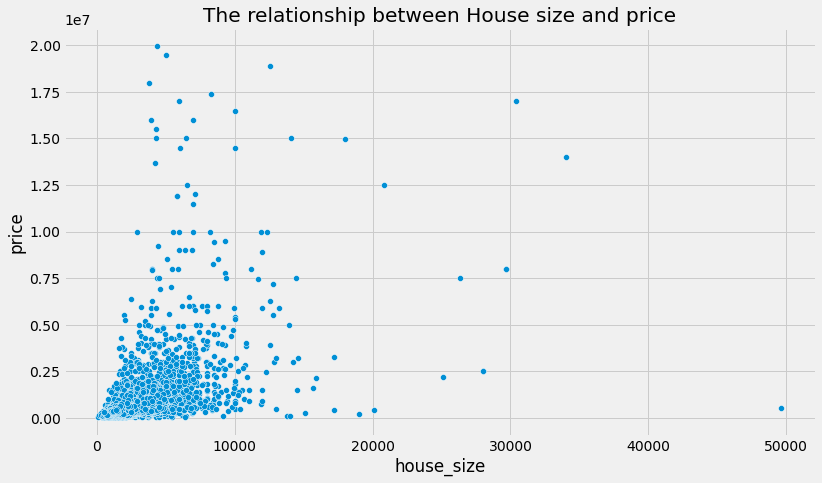

In [80]:
# The relationship between House size and price

plt.figure(figsize=(12,7))

sns.scatterplot(data=df,x="house_size",y="price")
plt.title("The relationship between House size and price")

There are a two outliers that make affect the prediction hence they need to be dropped. 

## Outliers Treatment

In [69]:
# Create new dataframe for dropping an outliers
data = df

data.sort_values(by = 'house_size', ascending = False).head()

,status,price,bed,bath,acre_lot,full_address,street,city,state,zip_code,house_size,sold_date
14172,for_sale,499000,4.0,2.0,1.25,162 Estate Carlton Frederiksted VI 00840,162 Estate Carlton,Frederiksted,Virgin Islands,840.0,49658.0,NaT
80518,for_sale,15150000,86.0,56.0,1.32,7779 and 93 Arlington St Framingham MA 01702,7779 and 93 Arlington St,Framingham,Massachusetts,1702.0,35666.0,NaT
64244,for_sale,14000000,10.0,17.0,200.00,38723874 Route 44 Millbrook NY 12545,38723874 Route 44,Millbrook,New York,12545.0,34000.0,NaT
11255,for_sale,16999000,9.0,12.0,0.47,86AA Com Cruz Bay Town Saint John VI 00830,86AA Com Cruz Bay Town,Saint John,Virgin Islands,830.0,30378.0,NaT
14323,for_sale,7995000,4.0,4.0,0.17,301 San Justo St San Juan PR 00901,301 San Justo St,San Juan,Puerto Rico,901.0,29679.0,NaT


In [ ]:
# Drop the largest house size
data.drop(10328,inplace=True)

In [74]:
data.sort_values(by = 'bed', ascending = False).head(7)

,status,price,bed,bath,acre_lot,full_address,street,city,state,zip_code,house_size,sold_date
80518,for_sale,15150000,86.0,56.0,1.32,7779 and 93 Arlington St Framingham MA 01702,7779 and 93 Arlington St,Framingham,Massachusetts,1702.0,35666.0,NaT
56861,for_sale,2850000,40.0,36.0,1.78,17 Church St Claverack NY 12565,17 Church St,Claverack,New York,12565.0,27443.0,NaT
14343,for_sale,13995000,33.0,35.0,0.09,312 San Francisco St San Juan PR 00901,312 San Francisco St,San Juan,Puerto Rico,901.0,15000.0,NaT
54659,for_sale,12500000,33.0,15.0,89.00,310 Old Stockbridge Rd Lenox MA 01240,310 Old Stockbridge Rd,Lenox,Massachusetts,1240.0,20821.0,1999-05-14
81397,for_sale,450000,31.0,14.0,1.61,35 Butler St Blackstone MA 01504,35 Butler St,Blackstone,Massachusetts,1504.0,13000.0,NaT
25113,for_sale,1500000,28.0,16.0,0.13,393399 Main St Holyoke MA 01040,393399 Main St,Holyoke,Massachusetts,1040.0,9999.0,NaT
95675,for_sale,1200000,27.0,9.0,0.11,175 Valley St Central Falls RI 02863,175 Valley St,Central Falls,Rhode Island,2863.0,10250.0,NaT


In [75]:
# Drop houses with more than 20 baths
data.drop([80518,56861,14343,57128,54443],inplace=True)

In [76]:
# Check for changes
data.head()

,status,price,bed,bath,acre_lot,full_address,street,city,state,zip_code,house_size,sold_date
0,for_sale,105000,3.0,2.0,0.12,Sector Yahuecas Titulo V84 Adjuntas PR 00601,Sector Yahuecas Titulo V84,Adjuntas,Puerto Rico,601.0,920.0,NaT
1,for_sale,80000,4.0,2.0,0.08,Km 78 9 Carr 135 Adjuntas PR 00601,Km 78 9 Carr 135,Adjuntas,Puerto Rico,601.0,1527.0,NaT
2,for_sale,67000,2.0,1.0,0.15,556G 556G 16 St Juana Diaz PR 00795,556G 556G 16 St,Juana Diaz,Puerto Rico,795.0,748.0,NaT
3,for_sale,145000,4.0,2.0,0.10,R5 Comunidad El Paraso Calle De Oro R5 Ponce P...,R5 Comunidad El Paraso Calle De Oro R5 Ponce,Ponce,Puerto Rico,731.0,1800.0,NaT
5,for_sale,179000,4.0,3.0,0.46,Bo Calabazas San Sebastian San Sebastian PR 00612,Bo Calabazas San Sebastian,San Sebastian,Puerto Rico,612.0,2520.0,NaT


## Updated Visualization after outlier removal

<AxesSubplot:xlabel='sold_date', ylabel='price'>

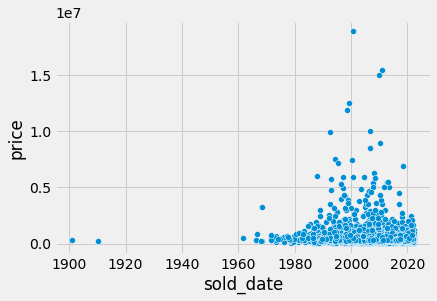

In [77]:
# Explore the change in price by the sold_date

sns.scatterplot(data=data , x="sold_date",y="price")

Text(0.5, 1.0, 'The relationship between number of baths and price')

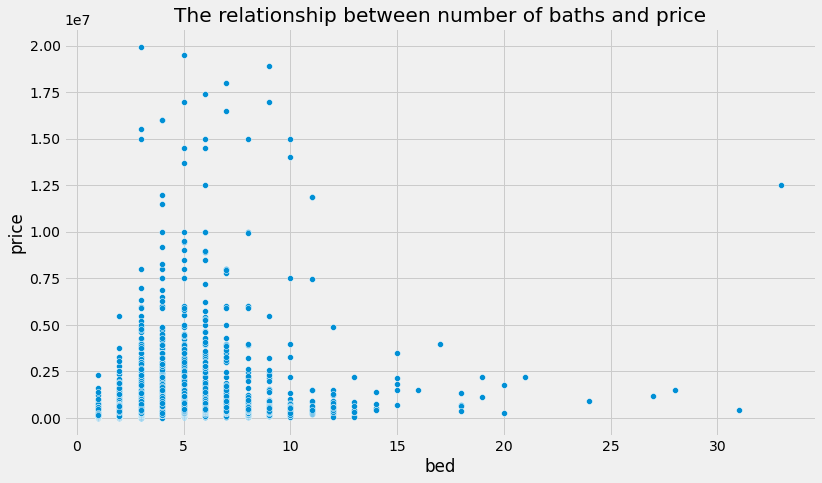

In [78]:
# The relationship between number of beds and price

plt.figure(figsize=(12,7))
sns.scatterplot(data=data,x="bed",y="price")
plt.title("The relationship between number of baths and price")

Text(0.5, 1.0, 'The relationship between House size and price')

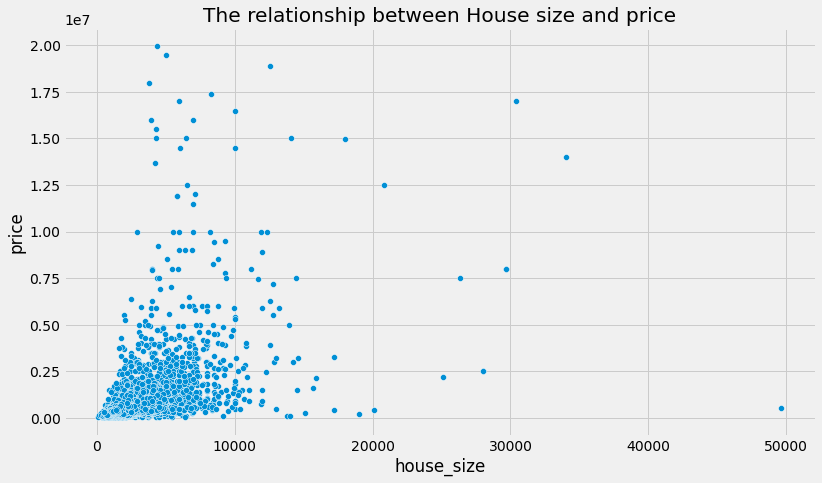

In [79]:
# Relationship between house sizes and price

plt.figure(figsize=(12,7))

sns.scatterplot(data=data,x="house_size",y="price")
plt.title("The relationship between House size and price")